In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam (1).csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1001,spam,Please call our customer service representativ...,NaN,NaN,NaN
2730,ham,I havent lei.. Next mon can?,NaN,NaN,NaN
4533,ham,I have no money 4 steve mate! !,NaN,NaN,NaN
3881,ham,Short But Cute: \Be a good person,"but dont try to prove it..\"" .Gud noon....""",NaN,NaN
1782,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop lastt 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3779,ham,Then ur physics get a-?
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
1399,ham,You have registered Sinco as Payee. Log in at ...
2711,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."
674,ham,"I've got &lt;#&gt; , any way I could pick up?"


In [8]:
#renaming cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5345,ham,Wat Ì_ doing now?
1124,ham,Aiyar sorry lor forgot 2 tell u...
4514,ham,That was random saw my old roomate on campus. ...
5380,ham,Its sunny in california. The weather's just cool
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#duplicate values
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# EDA(Exploratory Data Analysis)



In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

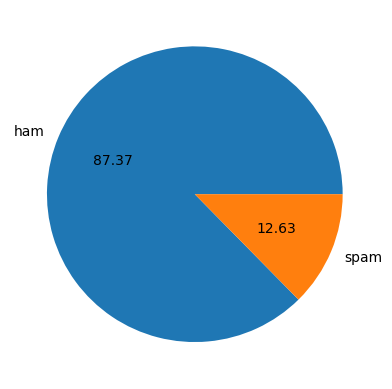

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
#Data is imbalanced

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ankita
[nltk_data]     Sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#number of characters
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

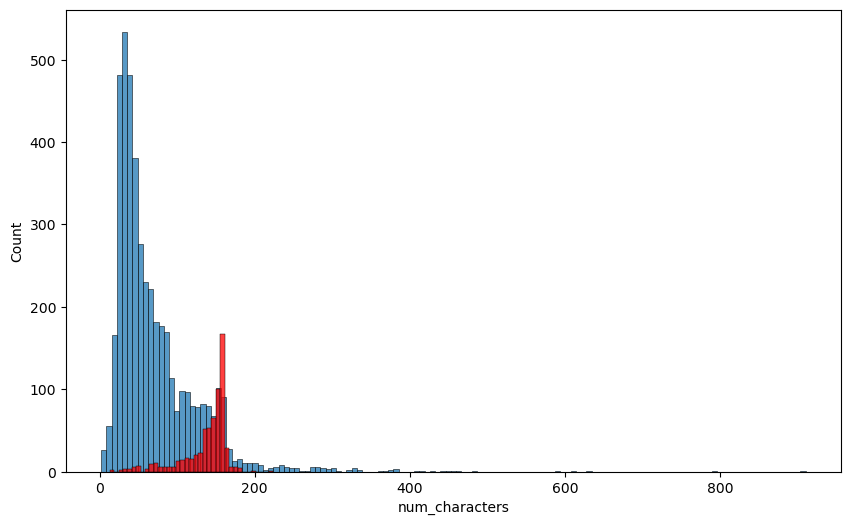

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

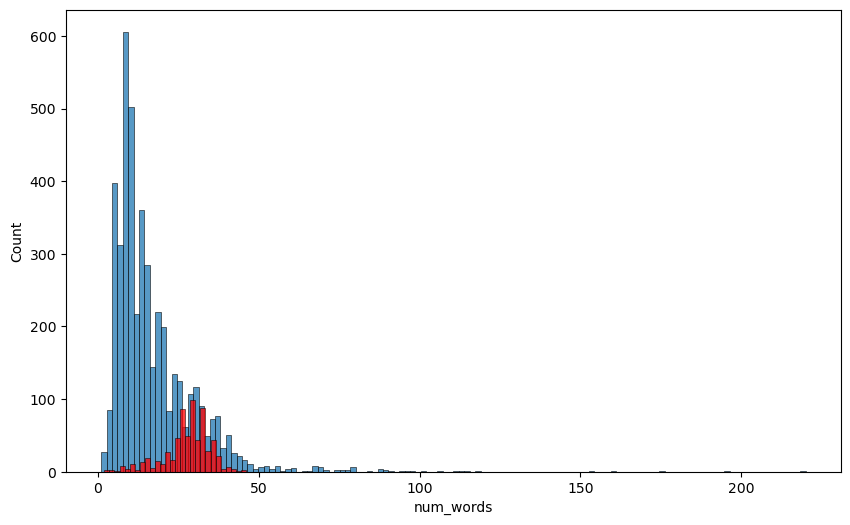

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:>

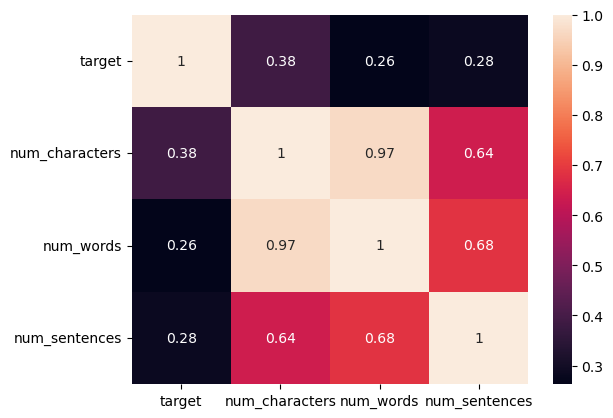

In [35]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
* Lower Case
* Tokenization
* Removing Special characters
* Removing stop words and punctuations
* Stemming

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ankita
[nltk_data]     Sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
!pip install wordcloud

In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

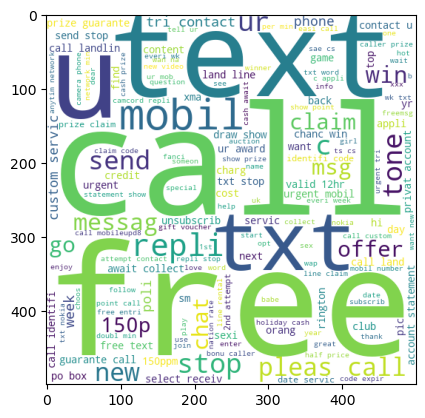

In [45]:
plt.imshow(spam_wc)

In [46]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

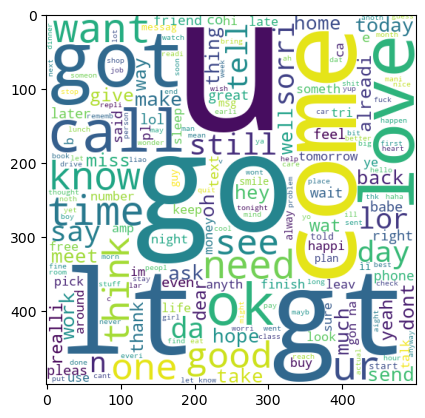

In [47]:
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
#finding top 30 words of each of ham and spam messages
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

C:\Users\Ankita Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


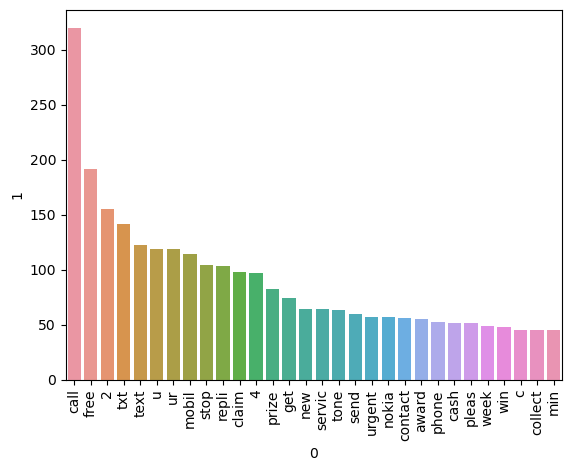

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
#finding top 30 words of each of ham and spam messages
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35394

C:\Users\Ankita Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


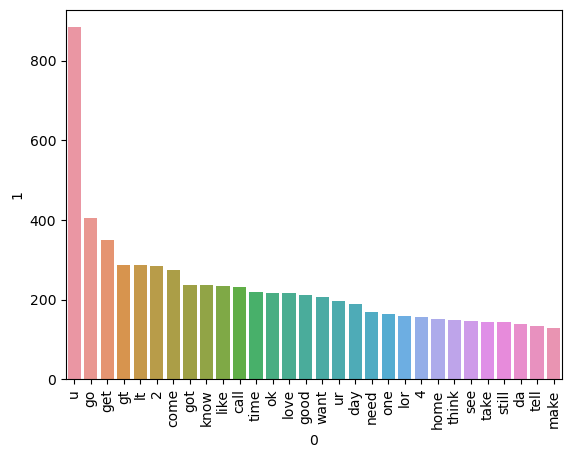

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [95]:
#vetorize data using bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features)

NameError: name 'max_features' is not defined

In [96]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [97]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [98]:
X.shape

(5169, 3000)

In [99]:
y=df['target'].values

In [100]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [102]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [104]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [105]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [106]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [107]:
!pip install xgboost

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
sv=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [110]:
clfs={
    'SVC':sv,
    'KN':knc,
    'nb':mnb,
    'dt':dtc,
    'lr':lrc,
    'rf':rfc,
    'ab':abc,
    'et':etc,
    'gb':gbdt,
    'xg':xgb
}

In [111]:
def train_class(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [112]:
train_class(sv,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [113]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_acc,current_prec=train_class(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy ",current_acc)
    print("Precision ",current_prec)
    accuracy_scores.append(current_acc)
    precision_scores.append(current_prec)

For  SVC
Accuracy  0.9758220502901354
Precision  0.9747899159663865


C:\Users\Ankita Sinha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  nb
Accuracy  0.9709864603481625
Precision  1.0
For  dt
Accuracy  0.9274661508704062
Precision  0.8118811881188119
For  lr
Accuracy  0.9564796905222437
Precision  0.979381443298969
For  rf
Accuracy  0.9748549323017408
Precision  0.9827586206896551
For  ab
Accuracy  0.960348162475822
Precision  0.9292035398230089
For  et
Accuracy  0.9748549323017408
Precision  0.9745762711864406
For  gb
Accuracy  0.9468085106382979
Precision  0.9191919191919192
For  xg
Accuracy  0.9661508704061895
Precision  0.9256198347107438


In [114]:
performance=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [115]:
performance

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,nb,0.970986,1.000000
3,dt,0.927466,0.811881
4,lr,0.956480,0.979381
5,rf,0.974855,0.982759
6,ab,0.960348,0.929204
7,et,0.974855,0.974576
8,gb,0.946809,0.919192
9,xg,0.966151,0.925620


In [116]:
performance_melted = performance.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

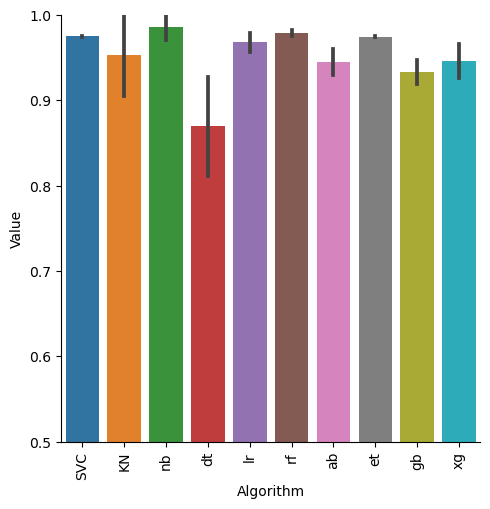

In [77]:
import seaborn as sns
sns.catplot(x='Algorithm',y='Value',data=performance_melted,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
#model improve
#1. Change the max_features parameter of tfidf

In [89]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [91]:
new_df = performance.merge(temp_df,on='Algorithm')

In [92]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [94]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,nb,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,dt,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881
4,lr,0.956480,0.979381,0.956480,0.979381,0.956480,0.979381,0.956480,0.979381
5,rf,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
6,ab,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,et,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
8,gb,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,xg,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pk1','wb'))